## Homework 01: due 22:00, Friday, September 30, 2022

### -	Please work on this Jupyter notebook directly.
### -	Name a folder using your student id and Assignment number (e.g., b88501045-HW1), put all the python scripts and notebook files into the folder and zip the folder (e.g., b88501045-HW1.zip).
### - Submit the homework directly through the NTU COOL course website.


### You will work with the attached CSV data file _Rain_MD-Androy-Bekily_1d_19810101-20211231_CHIRPS.csv_, and your specific tasks are:

#### 0. import essential modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### 1. (5% + 5%) Import CSV data file, and make column 'date' datetime format 

In [2]:
# define filename
fn_data = './Data/Rain_MD-Androy-Bekily_1d_19810101-20211231_CHIRPS.csv'

# read csv file, a dataframe will be created to store data
df_rain = pd.read_csv(fn_data)

#print(type(df_rain.iloc[0]['date']))

#convert 'str' to 'datetime'
df_rain['date'] = pd.to_datetime(df_rain['date'], format='%Y/%m/%d')

#print(type(df_rain.iloc[0]['date']))

#df_rain.head()
#df_rain.columns
#df_rain.index
#df_rain.iloc[0]

#### 2. (25% + 5%) Calculate rainfall totals for each year, and make a line plot illustrating the annual rainfall for location "1_9943". The x-axis is for time (in year) and the y-axis for rainfall totals (in mm), respectively. There shall be plot title ('annual rainfall'), legend and text labels for x- and y-axes for the plot.

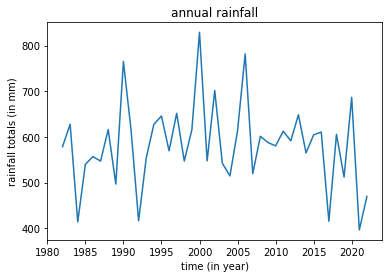

In [3]:
#resample in year and sum up
df_rain_1y = df_rain.resample(rule = '1Y',on = 'date',label = 'right').sum()

#assign x,y
x = df_rain_1y.index
y = df_rain_1y["1_9943"]

#plot
plt.plot(x,y)  

#display the title and label
plt.title("annual rainfall")
plt.xlabel('time (in year)')
plt.ylabel('rainfall totals (in mm)')

#show the plot
plt.show()

#df_rain_1y.columns
#df_rain_1y.head()
#df_rain_1y.iloc[0]

#### 3. (25% + 5%) Calculate maximum 1-day rainfall for each month, and export to a CSV file named _Rain_MD-Androy-Bekily_1d-1M-Mean_19810101-20211231_CHIRPS.csv_ 

In [4]:
#resample in month and find maximum
df_rain_1M = df_rain.resample(rule = '1M',on = 'date',label='left').max()

#export into csv
fn_data_out = './Data/Rain_MD-Androy-Bekily_1d-1M-Mean_19810101-20211231_CHIRPS.csv'
df_rain_1M.to_csv(fn_data_out, float_format='%.2f')

#df_rain_1M

#### 4. (25% + 5%) Calculate maximum 3 calendar-day rainfall for calendar month November for each year, and export to a CSV file named _Rain_MD-Androy-Bekily_3d-Nov-Max_19810101-20210530_CHIRPS.csv_ 

In [5]:
#resample in 3 calendar-day and sum up
df_rain_3D = df_rain.resample(rule = '3D',on = 'date').sum()

df_rain_3D = df_rain_3D.reset_index()
#df_rain_3D.head(20)

In [6]:
#resample in 1 Month and find maximum
df_rain_3D_1M = df_rain_3D.resample(rule = '1M',on = 'date').max()

#df_rain_3D_1M

df_rain_3D_1M_Nov = df_rain_3D_1M[df_rain_3D_1M['date'].dt.month == 11]

#df_rain_3D_1M_Nov

#export into csv
fn_data_out1 = './Data/Rain_MD-Androy-Bekily_3d-Nov-Max_19810101-20210530_CHIRPS.csv'
df_rain_3D_1M_Nov.to_csv(fn_data_out1, float_format='%.2f')

### For your reference, CHIRPS (Climate Hazards Group InfraRed Precipitation with Station data) is a satellite-based precipitation product. It has provided quasi-global rainfall estimate for over 35 years. You can find more information about CHRIPS via this link: https://www.nature.com/articles/sdata201566

### The CSV data file you work with here was clipped over a town called Bekily in the region of Androy Province, Madagascar. Farmers from Bekily are one of the poorest in the world, having no resources to build irrigation system, thus suffering a lot from the drought ( a consequence of climate change, impacting many regions in the world). 